In [1]:
import numpy as np
import pandas as pd

# Data Preprocessing
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocessing the training data
train_data = train_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
x_train = train_data.drop('Survived', axis=1).values
y_train = train_data['Survived'].values

# Preprocessing the test data
test_data = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
x_test = test_data.values

# Naive Bayes Algorithm
def naive_bayes(x_train, y_train, x_test):
    # Calculate class probabilities
    unique_classes = np.unique(y_train)
    class_probabilities = {}
    for cls in unique_classes:
        class_probabilities[cls] = np.sum(y_train == cls) / len(y_train)
    
    # Calculate feature probabilities
    feature_probabilities = {}
    for feature_index in range(x_train.shape[1]):
        feature_probabilities[feature_index] = {}
        unique_values = np.unique(x_train[:, feature_index])
        for value in unique_values:
            feature_probabilities[feature_index][value] = {}
            for cls in unique_classes:
                numerator = np.sum((x_train[:, feature_index] == value) & (y_train == cls))
                denominator = np.sum(y_train == cls)
                feature_probabilities[feature_index][value][cls] = numerator / denominator
    
    # Make predictions
    predictions = []
    for sample in x_test:
        probabilities = {}
        for cls in unique_classes:
            probabilities[cls] = class_probabilities[cls]
            for feature_index, value in enumerate(sample):
                if value in feature_probabilities[feature_index]:
                    probabilities[cls] *= feature_probabilities[feature_index][value][cls]
        predicted_cls = max(probabilities, key=probabilities.get)
        predictions.append(predicted_cls)
    
    return predictions

# K-Nearest Neighbors (KNN) Algorithm
from scipy.spatial.distance import cdist

def knn(x_train, y_train, x_test, k=3):
    # Calculate distances between training and test samples
    distances = cdist(x_train, x_test)
    
    # Find indices of k nearest neighbors for each test sample
    k_indices = np.argsort(distances, axis=0)[:k]
    
    # Get the labels of the k nearest neighbors
    k_nearest_labels = y_train[k_indices]
    
    # Count the occurrences of each class in the k nearest neighbors
    unique_classes, counts = np.unique(k_nearest_labels, return_counts=True)
    
    # Make predictions
    predictions = unique_classes[np.argmax(counts, axis=0)]
    
    return predictions

# Evaluation
gender_submissions = pd.read_csv('gender_submissions.csv')
y_test = gender_submissions['Survived'].values

# Using Naive Bayes
nb_predictions = naive_bayes(x_train, y_train, x_test)
nb_accuracy = np.sum(nb_predictions == y_test) / len(y_test)
print("Naive Bayes Accuracy:", nb_accuracy)

# Using KNN
knn_predictions = knn(x_train, y_train, x_test, k=3)
knn_accuracy = np.sum(knn_predictions == y_test) / len(y_test)
print("KNN Accuracy:", knn_accuracy)


Naive Bayes Accuracy: 0.8875598086124402
KNN Accuracy: 0.6363636363636364


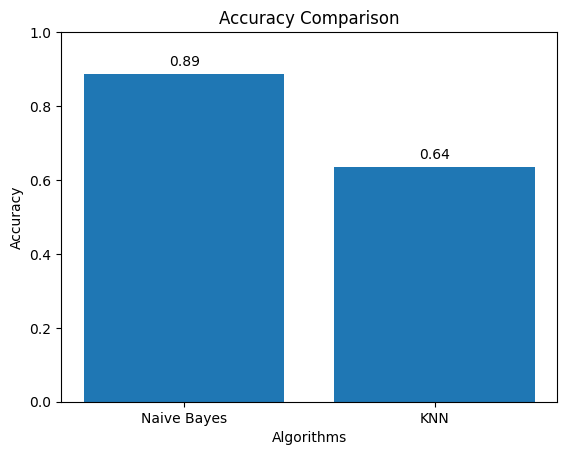

In [2]:
import matplotlib.pyplot as plt


# Visualization
algorithms = ['Naive Bayes', 'KNN']
accuracies = [nb_accuracy, knn_accuracy]

plt.bar(algorithms, accuracies)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim([0, 1])

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center')

plt.show()